In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataDict = {
'State' : pd.Series(['FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM'],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Total Energy' : pd.Series([-223.9842666, -223.9853412, -223.9849268,-223.9855121,-223.983616,-223.9858769,-223.9811426,-223.9856887,-223.977814,-223.9809027,-223.9666981,-223.9699511,-223.9487315,-223.9504364], index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Energy Error' : pd.Series([0.000198749851,0.0002006422582,0.0002021910102,0.0001981985947,0.0002058370136,0.000197865291,0.0002035847029,0.0002077939487,0.0001998573641,0.0002029641835,0.0002013813606,0.0002082358912,0.0001978426595,0.0002056810956],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00': pd.Series([-0.177263,-0.187528,-0.192815,-0.198587,-0.247282,-0.219076,-0.251564,-0.236547,-0.249033,-0.246752,-0.239232,-0.250832,-0.226327,-0.214689],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00 Error': pd.Series([0.011489,0.021736,0.022795,0.026765,0.016128,0.025611,0.015316,0.024514,0.015059,0.024084,0.024002,0.023776,0.024148,0.016817],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11':pd.Series([-0.172641,-0.164135,-0.166030,-0.156278,-0.130982,-0.154875,-0.126229,-0.155315,-0.127621,-0.157781,-0.130736,-0.163607,-0.178551,-0.066911],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11 Error': pd.Series([0.027543,0.021773,0.028057,0.026526,0.019462,0.025440,0.019195,0.024368,0.019394,0.024112,0.019182,0.023612,0.021926,0.016866],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01':pd.Series([0.022915,0.022554,0.024829,0.022597,0.026742,0.031251,0.026199,0.026811,0.026709,0.028992,0.026457,0.044807,0.062046,0.032632],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01 Error': pd.Series([0.017499,0.016840,0.023685,0.023354,0.027272,0.021161,0.022232,0.016385,0.021498,0.015951,0.020890,0.018569,0.018188,0.021088],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn 01': pd.Series([-0.019318,-0.018727,-0.019952,-0.018791,-0.019855,-0.020732,-0.019403,-0.022142,-0.019528,-0.023647,-0.019288,-0.025611,-0.044366,-0.015964],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn 01 Error': pd.Series([0.026186,0.021329,0.026027,0.026706,0.026900,0.026185,0.026649,0.025324,0.025949,0.024529,0.024399,0.023309,0.019740,0.017427],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),   
'O 01': pd.Series([-0.045668,-0.047099,-0.049548,-0.048841,-0.053420,-0.055667,-0.052255,-0.063078,-0.053030,-0.069421,-0.053489,-0.077510,-0.123805,-0.049000],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'O 01 Error': pd.Series([0.029077,0.027086,0.028086,0.026829,0.029792,0.029430,0.020077,0.027021,0.019570,0.026012,0.023898,0.025313,0.026271,0.021185],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90'])
}

In [6]:
keyData = pd.DataFrame(dataDict)
keyData

,Energy Error,Mn 01,Mn 01 Error,Mn-O 00,Mn-O 00 Error,Mn-O 01,Mn-O 01 Error,Mn-O 11,Mn-O 11 Error,O 01,O 01 Error,State,Total Energy
0,0.000199,-0.019318,0.026186,-0.177263,0.011489,0.022915,0.017499,-0.172641,0.027543,-0.045668,0.029077,FM,-223.984267
0,0.000201,-0.018727,0.021329,-0.187528,0.021736,0.022554,0.016840,-0.164135,0.021773,-0.047099,0.027086,AFM,-223.985341
15,0.000202,-0.019952,0.026027,-0.192815,0.022795,0.024829,0.023685,-0.166030,0.028057,-0.049548,0.028086,FM,-223.984927
15,0.000198,-0.018791,0.026706,-0.198587,0.026765,0.022597,0.023354,-0.156278,0.026526,-0.048841,0.026829,AFM,-223.985512
30,0.000206,-0.019855,0.026900,-0.247282,0.016128,0.026742,0.027272,-0.130982,0.019462,-0.053420,0.029792,FM,-223.983616
30,0.000198,-0.020732,0.026185,-0.219076,0.025611,0.031251,0.021161,-0.154875,0.025440,-0.055667,0.029430,AFM,-223.985877
45,0.000204,-0.019403,0.026649,-0.251564,0.015316,0.026199,0.022232,-0.126229,0.019195,-0.052255,0.020077,FM,-223.981143
45,0.000208,-0.022142,0.025324,-0.236547,0.024514,0.026811,0.016385,-0.155315,0.024368,-0.063078,0.027021,AFM,-223.985689
60,0.000200,-0.019528,0.025949,-0.249033,0.015059,0.026709,0.021498,-0.127621,0.019394,-0.053030,0.019570,FM,-223.977814
60,0.000203,-0.023647,0.024529,-0.246752,0.024084,0.028992,0.015951,-0.157781,0.024112,-0.069421,0.026012,AFM,-223.980903


[0.0002006422582, 0.0001981985947, 0.000197865291, 0.0002077939487, 0.0002029641835, 0.0002082358912, 0.0002056810956]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


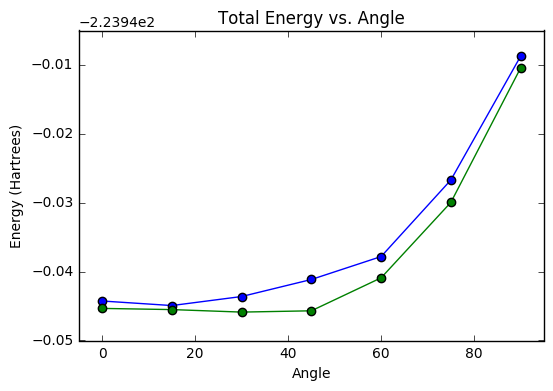

In [11]:
#energy

angle =[0,15,30,45,60,75,90]
afm = []
fm = []
errfm=[]
errafm=[]
for index, row in keyData.iterrows():
    if row[11] == 'FM':
        fm.append(row[12])
        errfm.append(row[0])
    else:
        afm.append(row[12])
        errafm.append(row[0])
plt.errorbar(angle,fm,errfm,marker='o',mew=1)
plt.errorbar(angle,afm,errafm,marker='o',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Angle')
plt.title('Total Energy vs. Angle')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


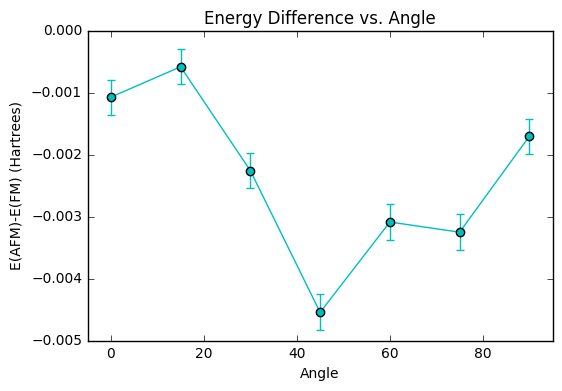

In [14]:
#create and plot energy diff

diff= np.array(afm)-np.array(fm)
errdiff = (np.array(errafm)**2+np.array(errfm)**2)**(1/2)
plt.errorbar(angle,diff,errdiff,marker='o',color='c',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('Angle')
plt.title('Energy Difference vs. Angle')

plt.show()

In [23]:
#beginning of a couple examples

MnO00afm = []
MnO00fm = []
errfm = []
errafm = []
for index, row in keyData.iterrows():
    if row[11] == 'FM':
        MnO00fm.append(row[3])
        errfm.append(row[4])
    else:
        MnO00afm.append(row[3])
        errafm.append(row[4])
MnO00afm = np.asarray(MnO00afm)
MnO00fm = np.asarray(MnO00fm)
errfm = np.asarray(errfm)
errafm = np.asarray(errafm)

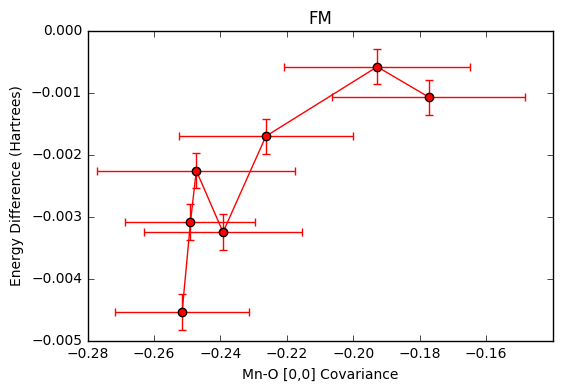

In [39]:
inds = MnO00fm.argsort()
sortedErr =errfm[inds]
sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1)
plt.ylabel('Energy Difference (Hartrees)')
plt.xlabel('Mn-O [0,0] Covariance')
plt.title('FM')
plt.show()

[-0.250832 -0.246752 -0.236547 -0.219076 -0.214689 -0.198587 -0.187528] [ 0.025313  0.026012  0.027021  0.02943   0.021185  0.026829  0.027086]


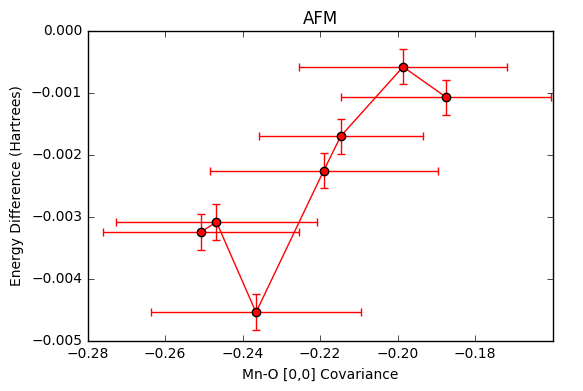

In [38]:
inds = MnO00afm.argsort()
sortedErr =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1)
plt.ylabel('Energy Difference (Hartrees)')
plt.xlabel('Mn-O [0,0] Covariance')
plt.title('AFM')
plt.show()

In [31]:
Oafm = []
Ofm = []
errfm = []
errafm = []
for index, row in keyData.iterrows():
    if row[11] == 'FM':
        Ofm.append(row[9])
        errfm.append(row[10])
    else:
        Oafm.append(row[9])
        errafm.append(row[10])
Oafm = np.asarray(Oafm)
Ofm = np.asarray(Ofm)
errfm = np.asarray(errfm)
errafm = np.asarray(errafm)

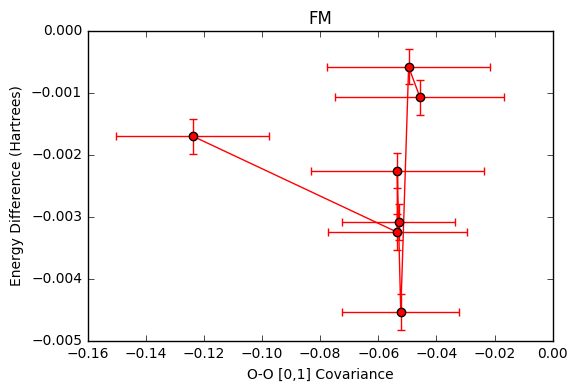

In [37]:
inds = Ofm.argsort()
sortedErr =errfm[inds]
sortedOfm = np.sort(Ofm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

plt.errorbar(sortedOfm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1)
plt.ylabel('Energy Difference (Hartrees)')
plt.xlabel('O-O [0,1] Covariance')
plt.title('FM')
plt.show()

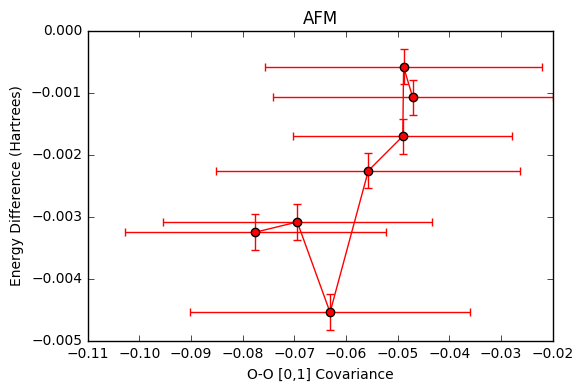

In [36]:
inds = Oafm.argsort()
sortedErr =errafm[inds]
sortedOafm = np.sort(Oafm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]


plt.errorbar(sortedOafm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1)
plt.ylabel('Energy Difference (Hartrees)')
plt.xlabel('O-O [0,1] Covariance')
plt.title('AFM')
plt.show()